In [15]:
import pandas as pd

input_ds = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

input_ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
len(pd.unique(input_ds['customerID']))

7043

In [25]:
def calculate_churn_rates(data, categorical_columns, target_column='churn'):
    """
    Calculate churn rate for each category in each categorical column.

    Parameters:
        data (pd.DataFrame): Input DataFrame with categorical variables and churn column.
        categorical_columns (list): List of column names that are categorical.
        target_column (str): Column indicating churn status (1 = churned, 0 = retained).

    Returns:
        pd.DataFrame: Long-form DataFrame with variable, category, and churn rate.
    """
    results = []
    total_rows = len(data)

    for col in categorical_columns:
        grouped = data.groupby(col)[target_column].agg(['mean','count']).reset_index()
        grouped.columns = ['category', 'churn_rate','count']
        grouped['rel_vol']=grouped['count']/total_rows
        grouped['variable'] = col
        results.append(grouped[['variable', 'category', 'churn_rate','rel_vol']])

    return pd.concat(results, ignore_index=True)

In [16]:
input_ds['Churn']=input_ds['Churn'].map({'Yes':1,'No':0})

In [17]:
input_ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [26]:
var_list = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

calculate_churn_rates(input_ds,var_list,target_column='Churn')

,variable,category,churn_rate,rel_vol
0,gender,Female,0.269209,0.495244
1,gender,Male,0.261603,0.504756
2,Partner,No,0.329580,0.516967
3,Partner,Yes,0.196649,0.483033
4,Dependents,No,0.312791,0.700412
5,Dependents,Yes,0.154502,0.299588
6,PhoneService,No,0.249267,0.096834
7,PhoneService,Yes,0.267096,0.903166
8,MultipleLines,No,0.250442,0.481329
9,MultipleLines,No phone service,0.249267,0.096834


In [29]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_churn_rates(results_df):
    """
    Plots churn rate for each category in each variable (one plot per variable).
    """
    # Get the unique variable names
    variables = results_df['variable'].unique()

    for var in variables:
        # Filter results for the current variable
        subset = results_df[results_df['variable'] == var]

        # Sort by category name for consistent line shape
        subset = subset.sort_values('category')

        # Make the plot
        plt.figure(figsize=(8, 4))
        plt.plot(subset['category'], subset['churn_rate'], marker='o')
        plt.title(f'Churn Rate by {var}')
        plt.xlabel(f'{var} Categories')
        plt.ylabel('Churn Rate')
        plt.ylim(0, 1)
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

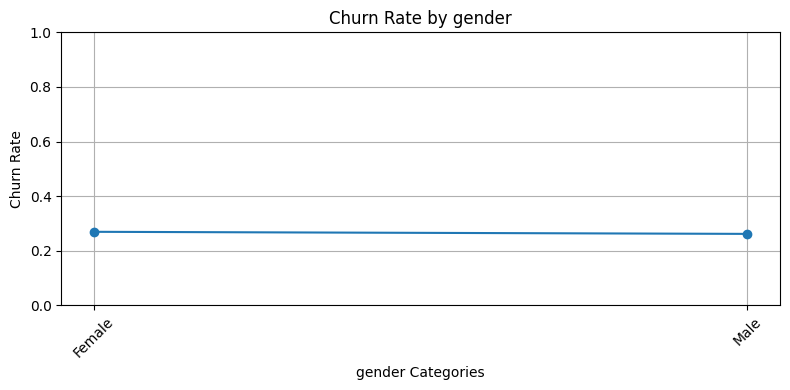

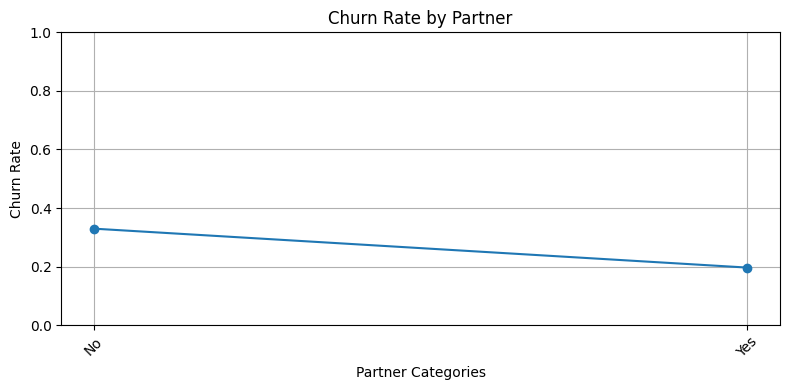

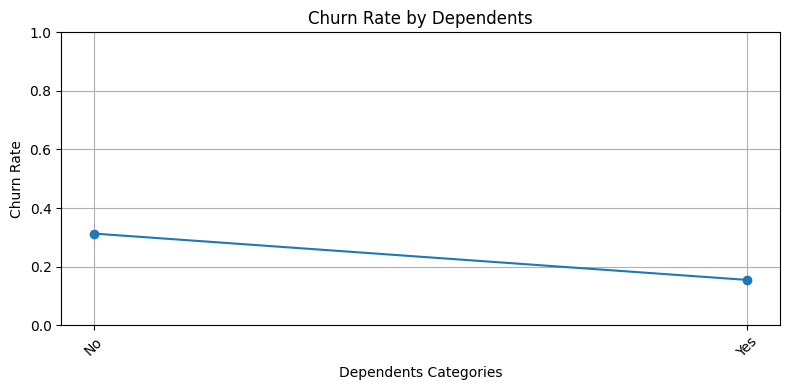

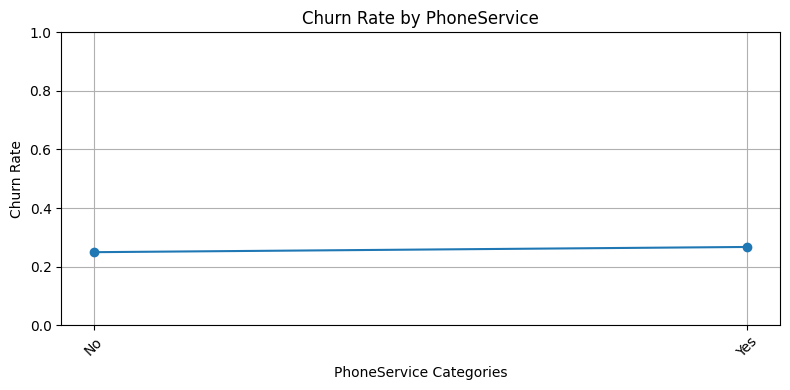

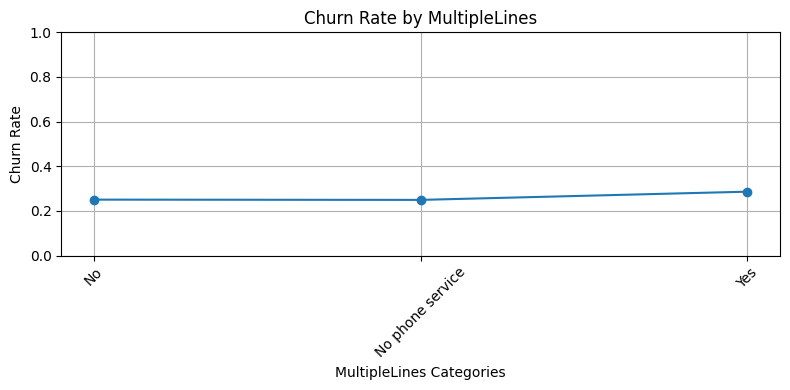

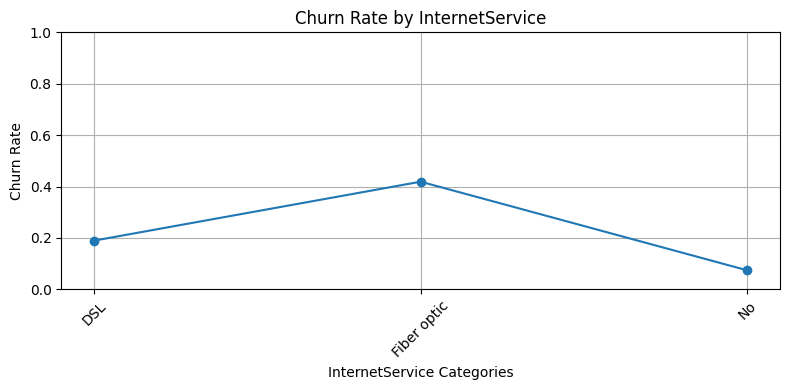

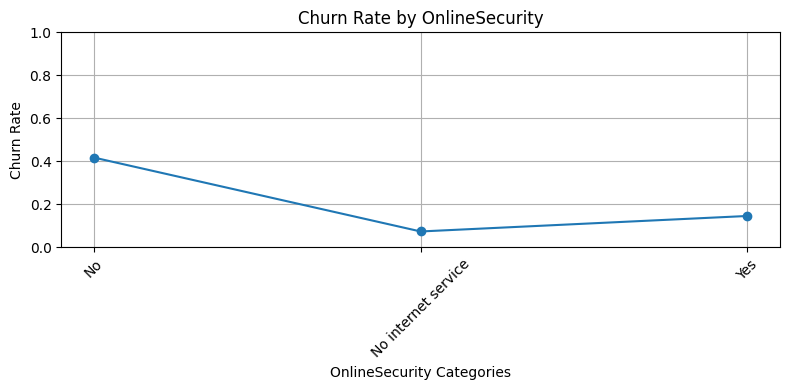

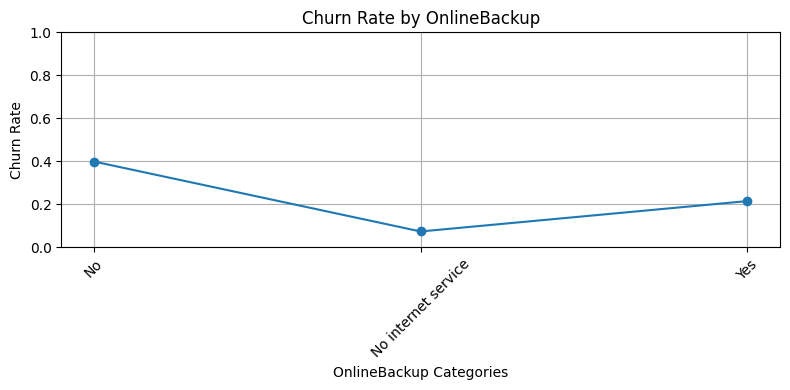

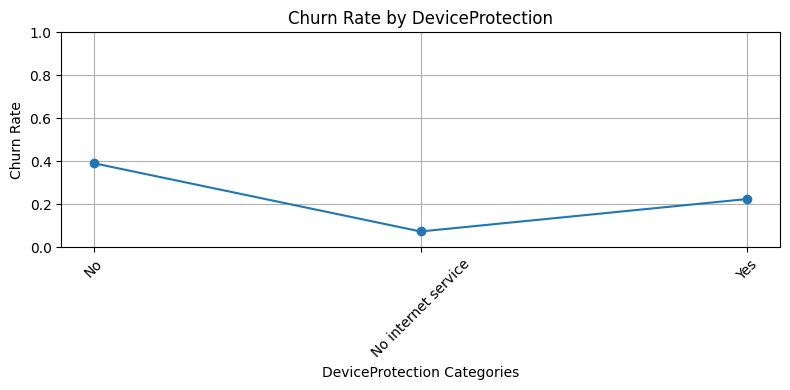

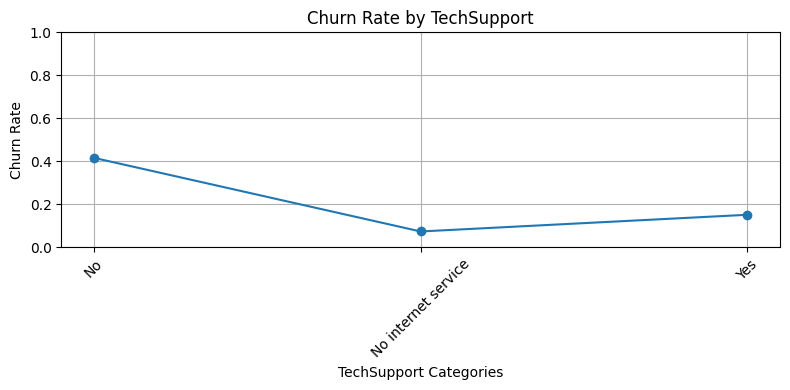

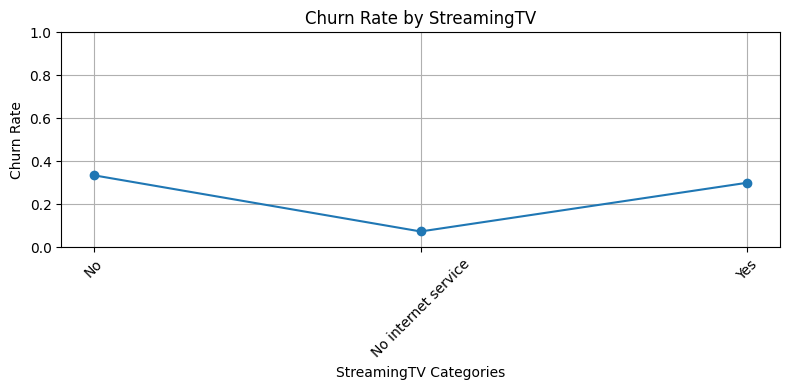

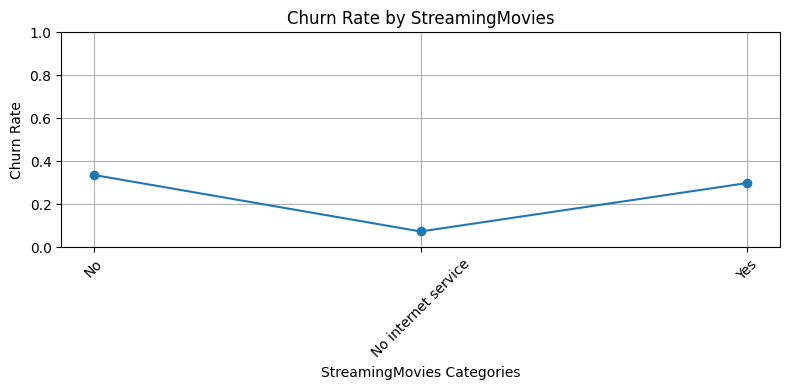

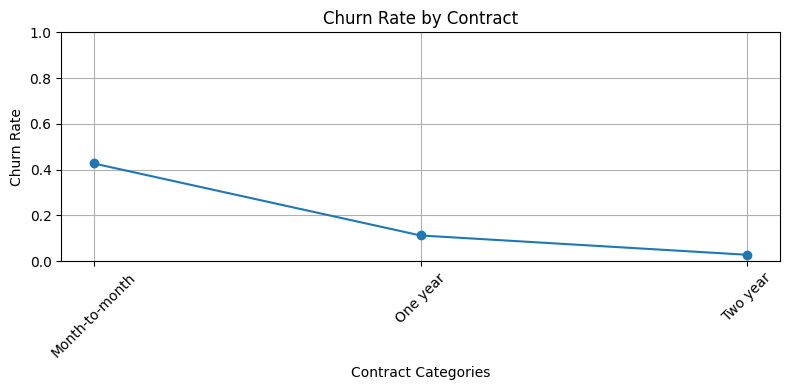

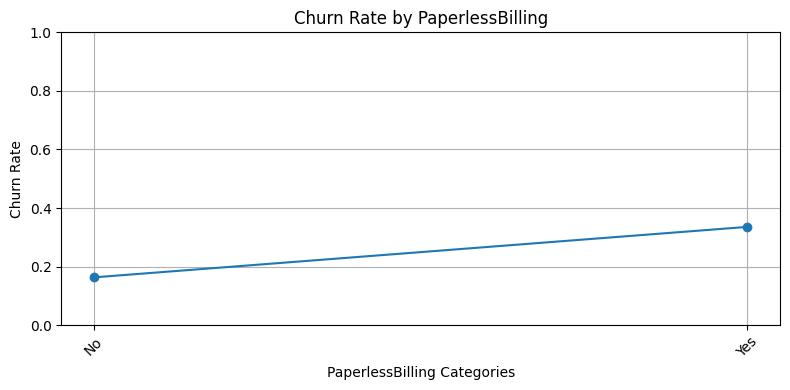

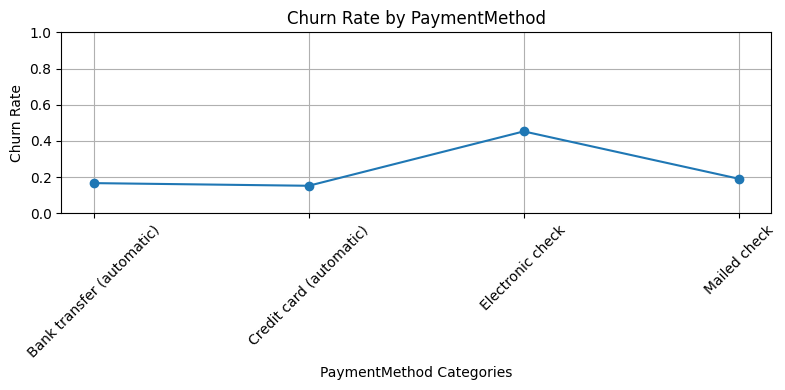

In [31]:
results_ds = calculate_churn_rates(input_ds,var_list,target_column='Churn')
plot_churn_rates(results_ds)